# <center>🚗 Motor Crash Data Analysis 🚔</center>
<h1 align="center" style="color:darkred; border-bottom: 2px solid; padding-bottom: 10px;">
    Comprehensive Insights into Motor Collisions Accidents
</h2>

![](https://drive.google.com/file/d/1hZFWVNFBCS3aXjd9xc_b_DQ_t7yeyzs3/view?usp=drive_link)
<p align="center" style="font-style:italic; font-size:16px;">
    Exploring Trends and Factors in Motorcycle Collisions<br><br>
    Data: Motor Vehicle Collisions - Crashes | NYC Open Data<br>
    Descriptions: Each row in the crash table corresponds to a crash event and includes relevant details. The Motor Vehicle Collisions data tables provide information on all police-reported motor vehicle collisions in NYC<br><br>



> By Chenze Chen, Ding(Wesley) Chen, Mason Freer<br>
  Date: 11/28/2023

    
</p>
<div>
    </ul>
</div>

---

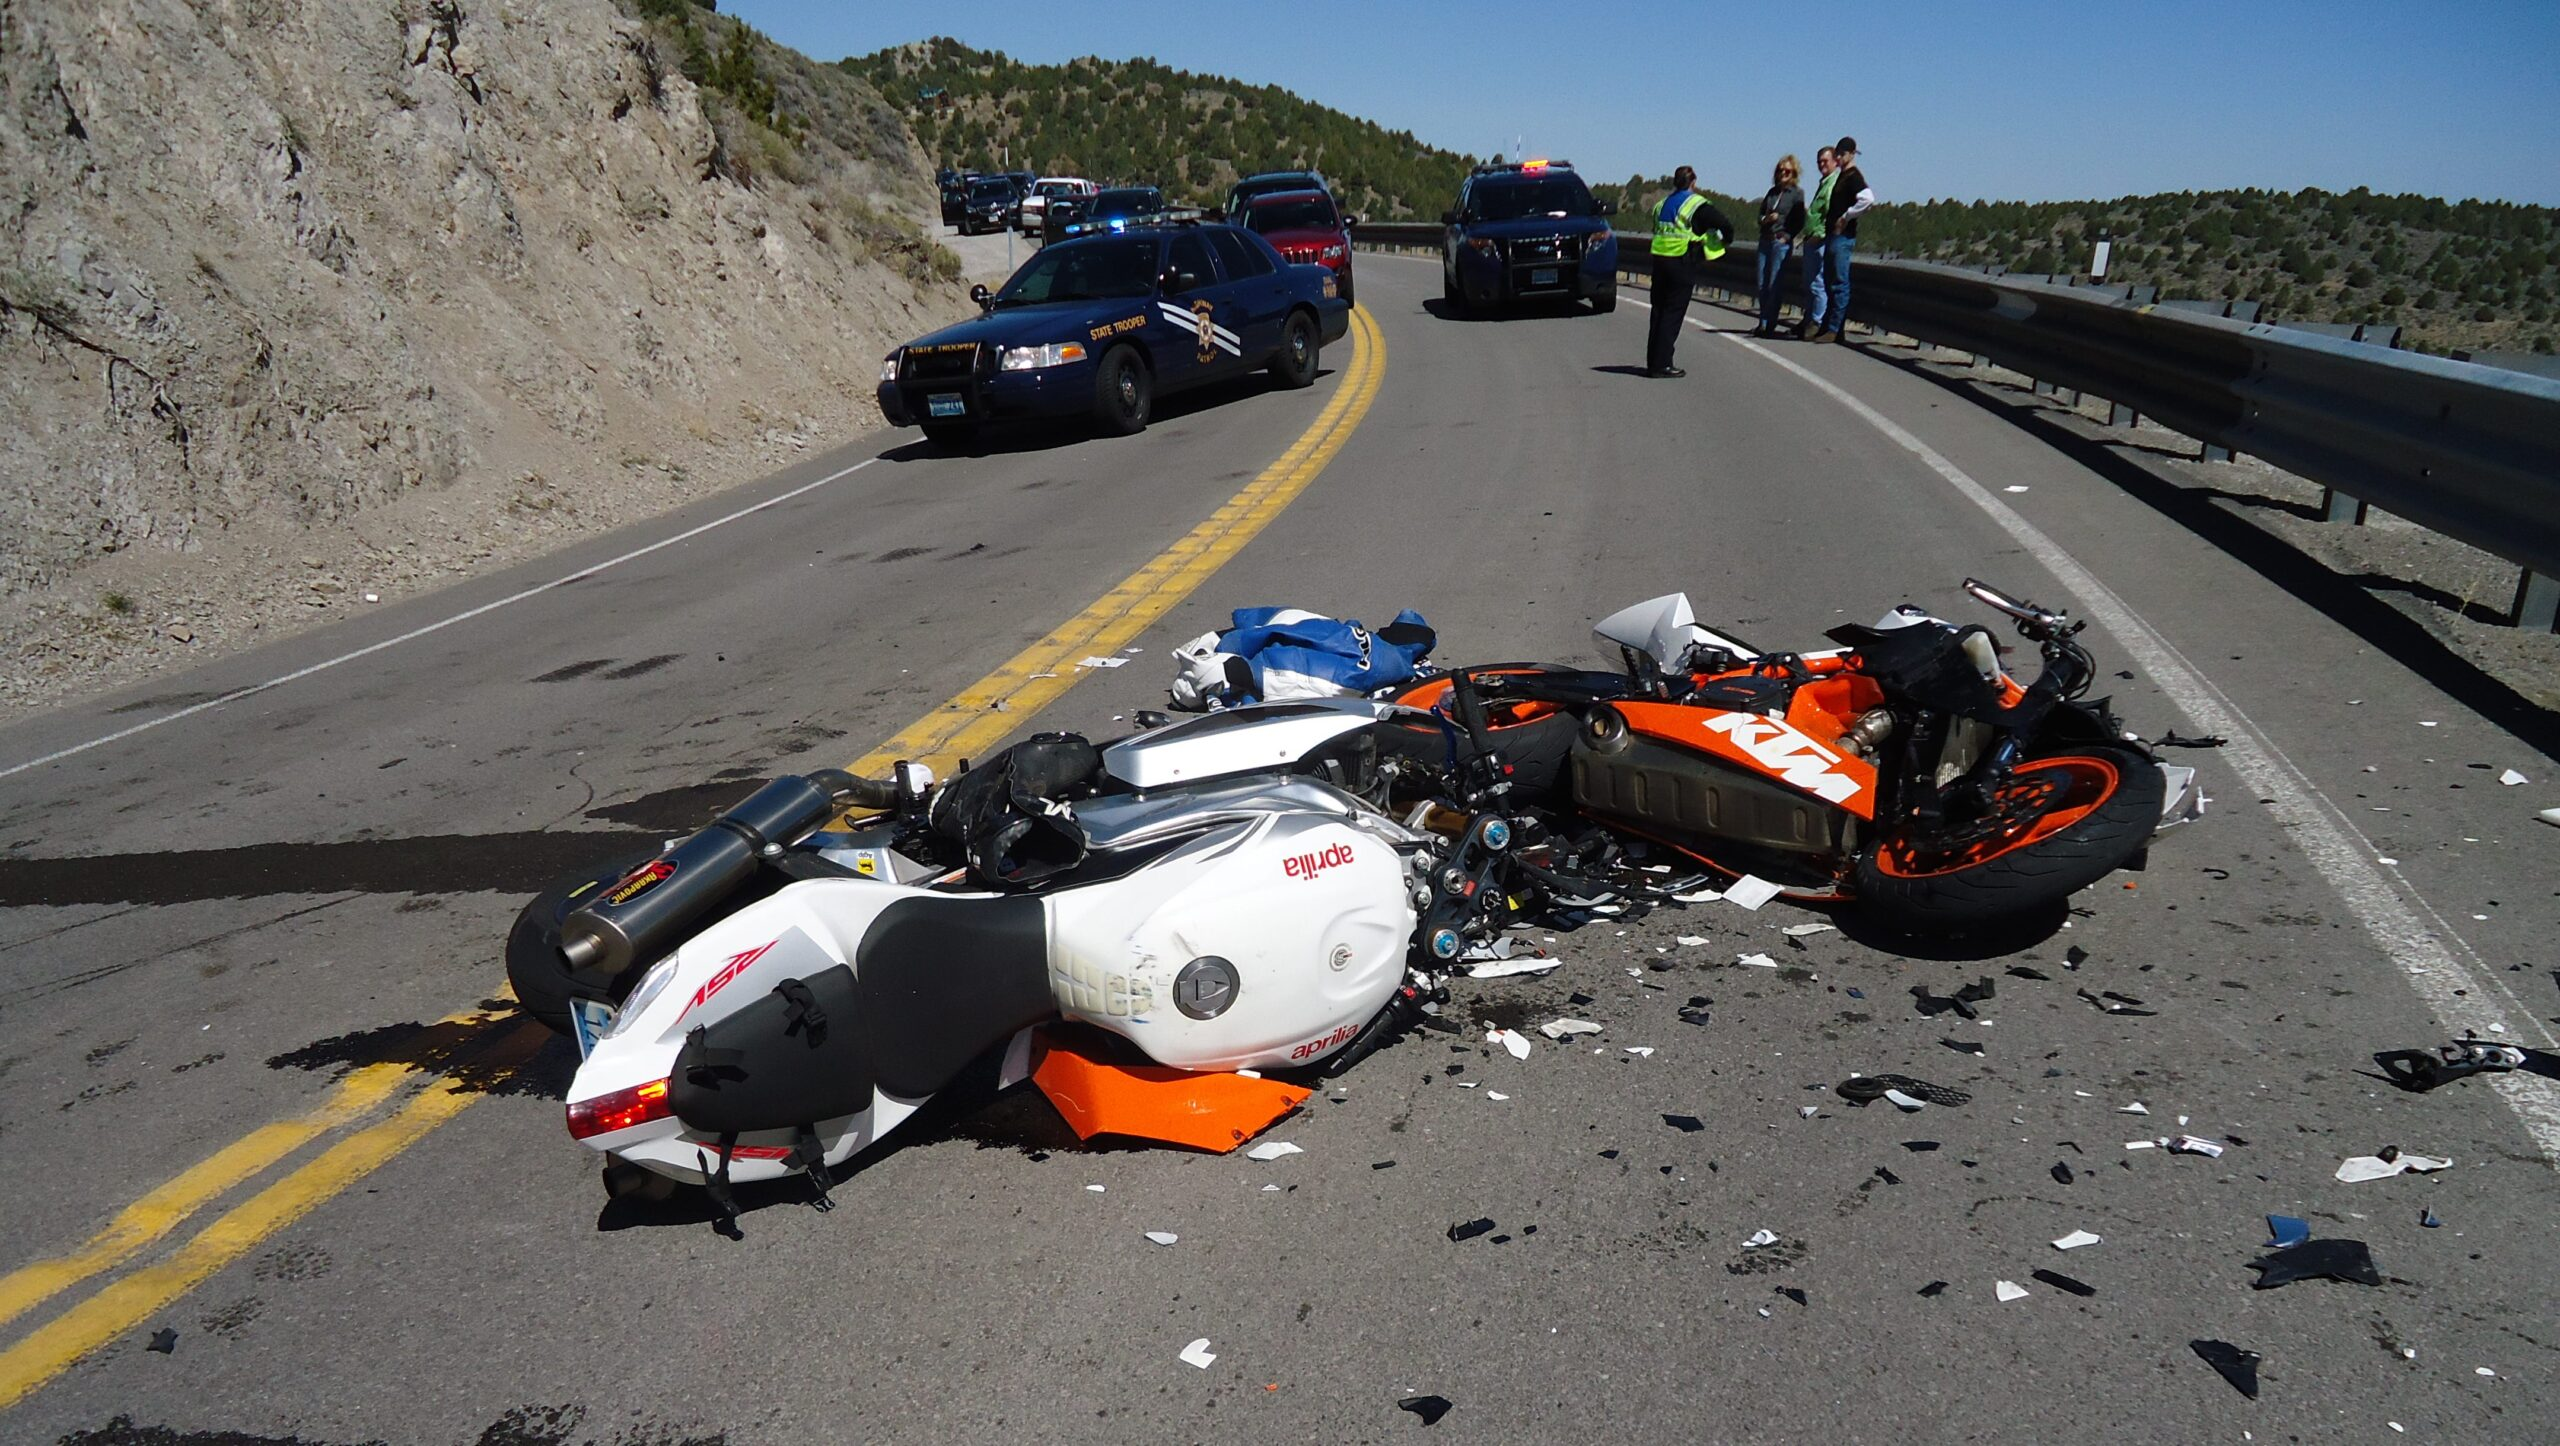

##🧹🧹🧹Data cleaning 🧹🧹🧹

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive/')

In [ ]:
# import necessary libraries

import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# load data

url = "https://data.cityofnewyork.us/api/views/h9gi-nx95/rows.csv?accessType=DOWNLOAD"

data = pd.read_csv(url)  # This file is 412MB so it may take about 4 mins to download

<ipython-input-3-4fd029941080>:5: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(url)  # This file is 412MB so it may take about 4 mins to download


In [ ]:
data

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/11/2021,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4455765,Sedan,Sedan,NaN,NaN,NaN
1,03/26/2022,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,...,NaN,NaN,NaN,NaN,4513547,Sedan,NaN,NaN,NaN,NaN
2,06/29/2022,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN
3,09/11/2021,9:35,BROOKLYN,11208.0,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,NaN,1211 LORING AVENUE,...,NaN,NaN,NaN,NaN,4456314,Sedan,NaN,NaN,NaN,NaN
4,12/14/2021,8:13,BROOKLYN,11233.0,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,NaN,...,NaN,NaN,NaN,NaN,4486609,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2048637,07/03/2023,18:05,NaN,NaN,40.866806,-73.931010,"(40.866806, -73.93101)",RIVERSIDE DRIVE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4648110,Sedan,Sedan,NaN,NaN,NaN
2048638,07/22/2023,21:39,BRONX,10457.0,40.844177,-73.902920,"(40.844177, -73.90292)",EAST 174 STREET,WEBSTER AVENUE,NaN,...,NaN,NaN,NaN,NaN,4648117,Sedan,NaN,NaN,NaN,NaN
2048639,07/02/2023,17:55,MANHATTAN,10006.0,40.711033,-74.014540,"(40.711033, -74.01454)",WEST STREET,LIBERTY STREET,NaN,...,NaN,NaN,NaN,NaN,4648366,Taxi,NaN,NaN,NaN,NaN
2048640,07/22/2023,13:15,QUEENS,11433.0,40.691580,-73.793190,"(40.69158, -73.79319)",110 AVENUE,157 STREET,NaN,...,Driver Inattention/Distraction,NaN,NaN,NaN,4648129,Station Wagon/Sport Utility Vehicle,E-Bike,NaN,NaN,NaN


In [ ]:
# Check data types
data.dtypes

CRASH DATE                        object
CRASH TIME                        object
BOROUGH                           object
ZIP CODE                          object
LATITUDE                         float64
LONGITUDE                        float64
LOCATION                          object
ON STREET NAME                    object
CROSS STREET NAME                 object
OFF STREET NAME                   object
NUMBER OF PERSONS INJURED        float64
NUMBER OF PERSONS KILLED         float64
NUMBER OF PEDESTRIANS INJURED      int64
NUMBER OF PEDESTRIANS KILLED       int64
NUMBER OF CYCLIST INJURED          int64
NUMBER OF CYCLIST KILLED           int64
NUMBER OF MOTORIST INJURED         int64
NUMBER OF MOTORIST KILLED          int64
CONTRIBUTING FACTOR VEHICLE 1     object
CONTRIBUTING FACTOR VEHICLE 2     object
CONTRIBUTING FACTOR VEHICLE 3     object
CONTRIBUTING FACTOR VEHICLE 4     object
CONTRIBUTING FACTOR VEHICLE 5     object
COLLISION_ID                       int64
VEHICLE TYPE COD

In [ ]:
# Describe the numerical data
data.describe()

,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,COLLISION_ID
count,1.816709e+06,1.816709e+06,2.048624e+06,2.048611e+06,2.048642e+06,2.048642e+06,2.048642e+06,2.048642e+06,2.048642e+06,2.048642e+06,2.048642e+06
mean,4.062763e+01,-7.375201e+01,3.065209e-01,1.473681e-03,5.583845e-02,7.341449e-04,2.663032e-02,1.127576e-04,2.205842e-01,6.043028e-04,3.139506e+06
std,1.981896e+00,3.727278e+00,6.969853e-01,4.040539e-02,2.426877e-01,2.756747e-02,1.630102e-01,1.066402e-02,6.580262e-01,2.676205e-02,1.504568e+06
min,0.000000e+00,-2.013600e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.200000e+01
25%,4.066787e+01,-7.397491e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.148280e+06
50%,4.072093e+01,-7.392728e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.660556e+06
75%,4.076960e+01,-7.386673e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.172959e+06
max,4.334444e+01,0.000000e+00,4.300000e+01,8.000000e+00,2.700000e+01,6.000000e+00,4.000000e+00,2.000000e+00,4.300000e+01,5.000000e+00,4.685429e+06


In [ ]:
# check NAs the data set
data.isnull().sum()

CRASH DATE                             0
CRASH TIME                             0
BOROUGH                           637302
ZIP CODE                          637548
LATITUDE                          231933
LONGITUDE                         231933
LOCATION                          231933
ON STREET NAME                    433155
CROSS STREET NAME                 770799
OFF STREET NAME                  1707860
NUMBER OF PERSONS INJURED             18
NUMBER OF PERSONS KILLED              31
NUMBER OF PEDESTRIANS INJURED          0
NUMBER OF PEDESTRIANS KILLED           0
NUMBER OF CYCLIST INJURED              0
NUMBER OF CYCLIST KILLED               0
NUMBER OF MOTORIST INJURED             0
NUMBER OF MOTORIST KILLED              0
CONTRIBUTING FACTOR VEHICLE 1       6580
CONTRIBUTING FACTOR VEHICLE 2     315024
CONTRIBUTING FACTOR VEHICLE 3    1902798
CONTRIBUTING FACTOR VEHICLE 4    2015832
CONTRIBUTING FACTOR VEHICLE 5    2039766
COLLISION_ID                           0
VEHICLE TYPE COD

In [ ]:
# Remove NA rows for "NUMBER OF PERSONS INJURED" and "NUMBER OF PERSONS KILLED"

# I remove rows if these two columns contain NA
# Because it does not make sense if there is no data provided


data_cleaned = data.dropna(subset=['NUMBER OF PERSONS INJURED','NUMBER OF PERSONS KILLED'])

# #check if it works
# data_cleaned.isnull().sum()

data_na = data[data['NUMBER OF PERSONS INJURED'].isna() & data['NUMBER OF PERSONS KILLED'].isna()]
display(data_na)

# check the NA rows that we have a good reason to remove those rows

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
569298,09/30/2018,6:30,QUEENS,11368.0,40.749767,-73.863810,"(40.749767, -73.86381)",NaN,NaN,102-21 ROOSEVELT AVENUE,...,NaN,NaN,NaN,NaN,4026403,Taxi,NaN,NaN,NaN,NaN
668715,05/16/2018,8:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4026020,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
728481,01/05/2018,15:00,BRONX,10465.0,40.822437,-73.837040,"(40.822437, -73.83704)",NaN,NaN,2478 WENNER PLACE,...,NaN,NaN,NaN,NaN,4025431,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
801514,10/05/2017,17:40,NaN,NaN,40.699844,-73.991035,"(40.699844, -73.991035)",CADMAN PLAZA WEST,NaN,NaN,...,NaN,NaN,NaN,NaN,4024976,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
810573,09/03/2017,16:30,MANHATTAN,10002.0,40.716846,-73.989555,"(40.716846, -73.989555)",NaN,NaN,344 GRAND STREET,...,NaN,NaN,NaN,NaN,4024788,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
851290,07/06/2017,20:50,QUEENS,11358.0,40.757755,-73.793040,"(40.757755, -73.79304)",NORTHERN BOULEVARD,UTOPIA PARKWAY,NaN,...,Unspecified,NaN,NaN,NaN,4024517,Sedan,Bike,NaN,NaN,NaN
868968,06/23/2017,10:30,BROOKLYN,11207.0,40.662920,-73.890625,"(40.66292, -73.890625)",NEW LOTS AVENUE,WYONA STREET,NaN,...,NaN,NaN,NaN,NaN,4024445,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
895559,05/01/2017,19:45,MANHATTAN,10007.0,40.717186,-74.012900,"(40.717186, -74.0129)",WEST STREET,CHAMBERS STREET,NaN,...,NaN,NaN,NaN,NaN,4024290,Bike,NaN,NaN,NaN,NaN
900769,04/26/2017,9:50,NaN,NaN,40.848312,-73.897350,"(40.848312, -73.89735)",WASHINGTON AVENUE,NaN,NaN,...,NaN,NaN,NaN,NaN,4024254,Sedan,NaN,NaN,NaN,NaN
931168,02/26/2017,14:42,BROOKLYN,11226.0,40.651104,-73.955900,"(40.651104, -73.9559)",NaN,NaN,2170 BEDFORD AVENUE,...,NaN,NaN,NaN,NaN,4024040,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN


In [ ]:
# Remove "ON STREET NAME", "CROSS STREET NAME", "OFF STREET NAME", "COLLISION_ID", "LOCATION"

data_cleaned_transformation = data_cleaned.drop(columns=['ON STREET NAME', 'CROSS STREET NAME','OFF STREET NAME','COLLISION_ID','LOCATION'])

#check if it works
data_cleaned_transformation.isnull().sum()

CRASH DATE                             0
CRASH TIME                             0
BOROUGH                           637291
ZIP CODE                          637537
LATITUDE                          231930
LONGITUDE                         231930
NUMBER OF PERSONS INJURED              0
NUMBER OF PERSONS KILLED               0
NUMBER OF PEDESTRIANS INJURED          0
NUMBER OF PEDESTRIANS KILLED           0
NUMBER OF CYCLIST INJURED              0
NUMBER OF CYCLIST KILLED               0
NUMBER OF MOTORIST INJURED             0
NUMBER OF MOTORIST KILLED              0
CONTRIBUTING FACTOR VEHICLE 1       6573
CONTRIBUTING FACTOR VEHICLE 2     314994
CONTRIBUTING FACTOR VEHICLE 3    1902761
CONTRIBUTING FACTOR VEHICLE 4    2015795
CONTRIBUTING FACTOR VEHICLE 5    2039729
VEHICLE TYPE CODE 1                13201
VEHICLE TYPE CODE 2               387108
VEHICLE TYPE CODE 3              1907957
VEHICLE TYPE CODE 4              2016911
VEHICLE TYPE CODE 5              2039997
dtype: int64

In [ ]:
data_cleaned_transformation

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,...,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/11/2021,2:39,NaN,NaN,NaN,NaN,2.0,0.0,0,0,...,Aggressive Driving/Road Rage,Unspecified,NaN,NaN,NaN,Sedan,Sedan,NaN,NaN,NaN
1,03/26/2022,11:45,NaN,NaN,NaN,NaN,1.0,0.0,0,0,...,Pavement Slippery,NaN,NaN,NaN,NaN,Sedan,NaN,NaN,NaN,NaN
2,06/29/2022,6:55,NaN,NaN,NaN,NaN,0.0,0.0,0,0,...,Following Too Closely,Unspecified,NaN,NaN,NaN,Sedan,Pick-up Truck,NaN,NaN,NaN
3,09/11/2021,9:35,BROOKLYN,11208.0,40.667202,-73.866500,0.0,0.0,0,0,...,Unspecified,NaN,NaN,NaN,NaN,Sedan,NaN,NaN,NaN,NaN
4,12/14/2021,8:13,BROOKLYN,11233.0,40.683304,-73.917274,0.0,0.0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2048637,07/03/2023,18:05,NaN,NaN,40.866806,-73.931010,0.0,0.0,0,0,...,Turning Improperly,Unspecified,NaN,NaN,NaN,Sedan,Sedan,NaN,NaN,NaN
2048638,07/22/2023,21:39,BRONX,10457.0,40.844177,-73.902920,1.0,0.0,1,0,...,Unspecified,NaN,NaN,NaN,NaN,Sedan,NaN,NaN,NaN,NaN
2048639,07/02/2023,17:55,MANHATTAN,10006.0,40.711033,-74.014540,0.0,0.0,0,0,...,Driver Inattention/Distraction,NaN,NaN,NaN,NaN,Taxi,NaN,NaN,NaN,NaN
2048640,07/22/2023,13:15,QUEENS,11433.0,40.691580,-73.793190,1.0,0.0,0,0,...,Driver Inattention/Distraction,Driver Inattention/Distraction,NaN,NaN,NaN,Station Wagon/Sport Utility Vehicle,E-Bike,NaN,NaN,NaN


In [ ]:
# checking for duplicates

duplicate_df = data_cleaned_transformation[data_cleaned_transformation.duplicated()]
duplicate_df.shape

(2488, 24)

In [ ]:
# checking for uniques
data_cleaned_transformation['CONTRIBUTING FACTOR VEHICLE 1'].unique()

# convert 'illnes' to 'illness'
data_cleaned_transformation['CONTRIBUTING FACTOR VEHICLE 1'] = data_cleaned_transformation['CONTRIBUTING FACTOR VEHICLE 1'].replace('Drugs (Illegal)', 'Drugs (illegal)')
# convert 'Drugs (Illegal)' to 'Drugs (illegal)'
data_cleaned_transformation['CONTRIBUTING FACTOR VEHICLE 1'] = data_cleaned_transformation['CONTRIBUTING FACTOR VEHICLE 1'].replace('Illnes', 'Illness')

<Axes: >

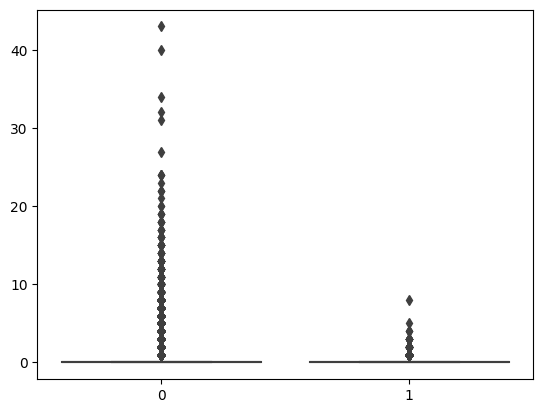

In [ ]:
# checking for outliers through boxplot


sns.boxplot(data=[data_cleaned_transformation['NUMBER OF PERSONS INJURED'], data_cleaned_transformation['NUMBER OF PERSONS KILLED']])
#data.boxplot(column=['NUMBER OF PERSONS INJURED'])
#data.boxplot(column=['NUMBER OF PERSONS KILLED'])

# No outliers present

In [ ]:
# check for correlation

correlation = data.corr()
correlation.style.background_gradient(cmap='coolwarm')

<ipython-input-14-19e44d87eeb1>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = data.corr()


,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,COLLISION_ID
LATITUDE,1.000000,-0.963426,-0.007853,-0.001107,-0.004022,-0.002014,-0.004503,0.000489,-0.004705,0.000181,-0.036946
LONGITUDE,-0.963426,1.000000,0.008372,0.001147,0.004269,0.001975,0.003801,-0.000509,0.005370,-0.000066,0.036562
NUMBER OF PERSONS INJURED,-0.007853,0.008372,1.000000,0.014814,0.277108,0.002159,0.173395,-0.001235,0.906171,0.020714,0.062793
NUMBER OF PERSONS KILLED,-0.001107,0.001147,0.014814,1.000000,0.005597,0.691431,-0.004031,0.278299,0.014597,0.661858,0.004652
NUMBER OF PEDESTRIANS INJURED,-0.004022,0.004269,0.277108,0.005597,1.000000,0.011018,-0.032406,0.000585,-0.066278,-0.002941,-0.002079
NUMBER OF PEDESTRIANS KILLED,-0.002014,0.001975,0.002159,0.691431,0.011018,1.000000,-0.002830,0.021304,-0.000935,0.005353,0.000679
NUMBER OF CYCLIST INJURED,-0.004503,0.003801,0.173395,-0.004031,-0.032406,-0.002830,1.000000,0.001642,-0.051469,-0.003689,0.028931
NUMBER OF CYCLIST KILLED,0.000489,-0.000509,-0.001235,0.278299,0.000585,0.021304,0.001642,1.000000,-0.001875,-0.000239,0.002793
NUMBER OF MOTORIST INJURED,-0.004705,0.005370,0.906171,0.014597,-0.066278,-0.000935,-0.051469,-0.001875,1.000000,0.024057,0.055352
NUMBER OF MOTORIST KILLED,0.000181,-0.000066,0.020714,0.661858,-0.002941,0.005353,-0.003689,-0.000239,0.024057,1.000000,0.004478


In [ ]:
# End of data cleaning #

In [ ]:
crash_data = data_cleaned_transformation

In [ ]:
crash_data

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,...,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/11/2021,2:39,NaN,NaN,NaN,NaN,2.0,0.0,0,0,...,Aggressive Driving/Road Rage,Unspecified,NaN,NaN,NaN,Sedan,Sedan,NaN,NaN,NaN
1,03/26/2022,11:45,NaN,NaN,NaN,NaN,1.0,0.0,0,0,...,Pavement Slippery,NaN,NaN,NaN,NaN,Sedan,NaN,NaN,NaN,NaN
2,06/29/2022,6:55,NaN,NaN,NaN,NaN,0.0,0.0,0,0,...,Following Too Closely,Unspecified,NaN,NaN,NaN,Sedan,Pick-up Truck,NaN,NaN,NaN
3,09/11/2021,9:35,BROOKLYN,11208.0,40.667202,-73.866500,0.0,0.0,0,0,...,Unspecified,NaN,NaN,NaN,NaN,Sedan,NaN,NaN,NaN,NaN
4,12/14/2021,8:13,BROOKLYN,11233.0,40.683304,-73.917274,0.0,0.0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2048637,07/03/2023,18:05,NaN,NaN,40.866806,-73.931010,0.0,0.0,0,0,...,Turning Improperly,Unspecified,NaN,NaN,NaN,Sedan,Sedan,NaN,NaN,NaN
2048638,07/22/2023,21:39,BRONX,10457.0,40.844177,-73.902920,1.0,0.0,1,0,...,Unspecified,NaN,NaN,NaN,NaN,Sedan,NaN,NaN,NaN,NaN
2048639,07/02/2023,17:55,MANHATTAN,10006.0,40.711033,-74.014540,0.0,0.0,0,0,...,Driver Inattention/Distraction,NaN,NaN,NaN,NaN,Taxi,NaN,NaN,NaN,NaN
2048640,07/22/2023,13:15,QUEENS,11433.0,40.691580,-73.793190,1.0,0.0,0,0,...,Driver Inattention/Distraction,Driver Inattention/Distraction,NaN,NaN,NaN,Station Wagon/Sport Utility Vehicle,E-Bike,NaN,NaN,NaN


## <div align="center">⏰ Time Analysis - Wes 📊</div>


<h2 style="background-color: #f8f8f8; border-left: 5px solid #007BFF; padding: 10px; margin: 10px 0;">
    <strong>Objective:</strong> In this section, we examine the time factors of our dataset to discern patterns and trends.
</h2>

<div style="color: darkgreen;">
    <h3>🔍 Analysis Focus:</h3>
    <ul>
        ⏰ Hour ⏰ Day ⏰ Month ⏰ Year 💥Number of crash 💀 People affected
    </ul>
</div>

---


## <div align="center">⏰ Hour and 💥Number of crash</div>

Some insights:
*   There is a gradual increase from the early hours of the morning, reaching a first peak around hour 8, which could correspond to the morning rush hour.
*   From hour 10, there is a significant increase in the number of crashes, reaching the highest peak between hours 14 and 15, suggesting a high incidence of crashes in the early to mid-afternoon
*   The number of crashes continues to decline after hour 17, with a more pronounced drop after hour 19, and reaching the lowest points after hour 22 until the end of the day







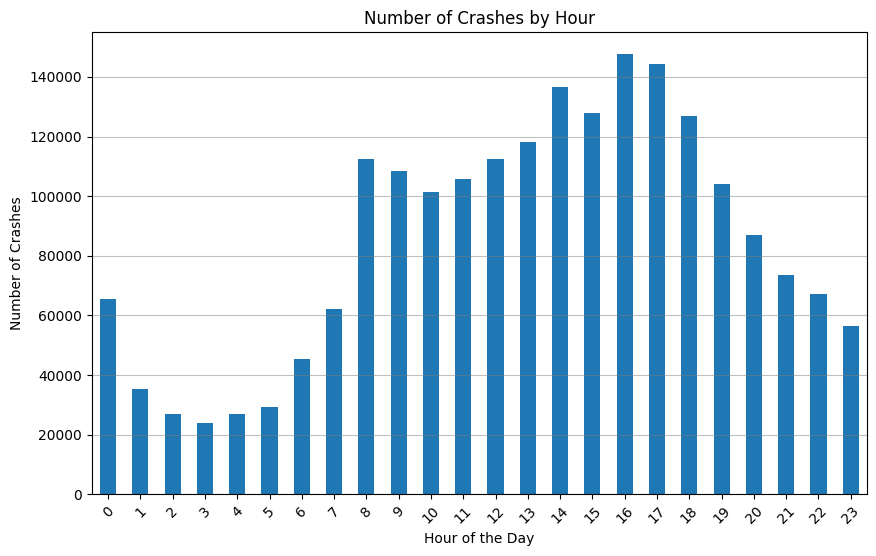

In [ ]:

time_analysis = crash_data

time_analysis['CRASH TIME'] = pd.to_datetime(time_analysis['CRASH TIME'], format='%H:%M').dt.time

time_analysis['HOUR'] = time_analysis['CRASH TIME'].apply(lambda x: x.hour)

hourly_crashes = time_analysis.groupby('HOUR').size()

plt.figure(figsize=(10, 6))
hourly_crashes.plot(kind='bar')
plt.title('Number of Crashes by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Crashes')
plt.grid(True, alpha = 0.5, color = 'grey', axis = 'y')
plt.xticks(rotation=45)
plt.show()

## <div align="center">⏰ Day and 💥Number of crash</div>

Some insights:


*   Friday has the highest number of crashes of all weekdays, suggesting a significant increase in incidents
*   Sunday shows the lowest number of crashes for the entire week, with a substantial decrease from Saturday
*   The pattern suggests that crash frequency increases as the week progresses, with the peak on Friday, which could be associated with higher traffic volumes due to weekend plans or end-of-week commuting. The decrease during the weekend, particularly on Sunday, might be due to less commuter traffic and possibly fewer vehicles on the road.





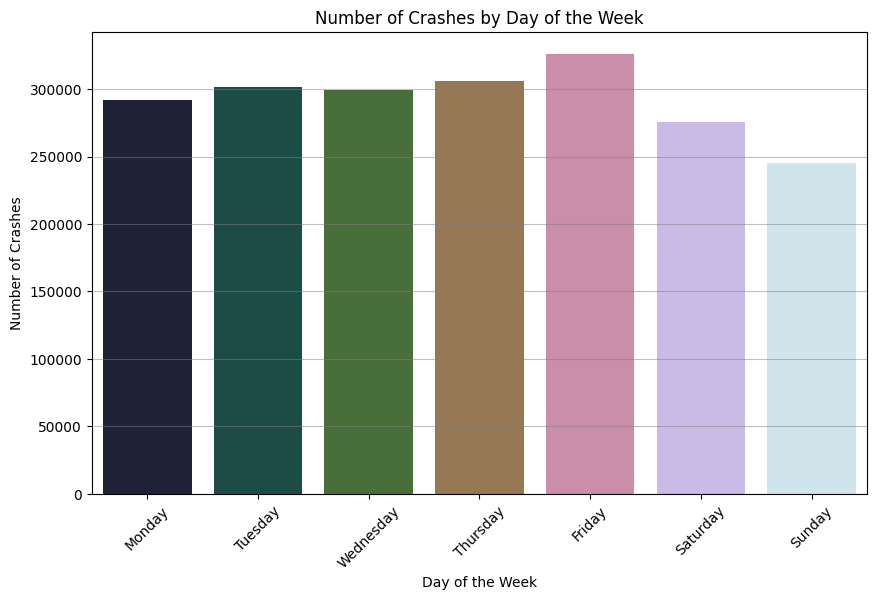

In [ ]:
# Convert 'CRASH DATE' to datetime
time_analysis['CRASH DATE'] = pd.to_datetime(time_analysis['CRASH DATE'])

# Extract day of the week (e.g., Monday, Tuesday, etc.)
time_analysis['WEEKDAY'] = time_analysis['CRASH DATE'].dt.day_name()

# Aggregate data by day of the week
crashes_by_weekday = time_analysis.groupby('WEEKDAY').size().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(y=crashes_by_weekday, x=crashes_by_weekday.index, palette = 'cubehelix')
plt.title('Number of Crashes by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Crashes')
plt.xticks(rotation=45)
plt.grid(True, alpha = 0.5, color = 'grey', axis = 'y')
plt.show()

## <div align="center">⏰ Month and 💥Number of crash</div>

some insights:


*   The pattern suggests seasonal variability, with the summer months (June, July, August) and December showing higher numbers of crashes. This could be due to a variety of factors, such as increased travel during summer holidays and potentially hazardous driving conditions during the winter holidays in December. Conversely, the lower numbers in February and November might reflect fewer travel activities or other seasonal influences.





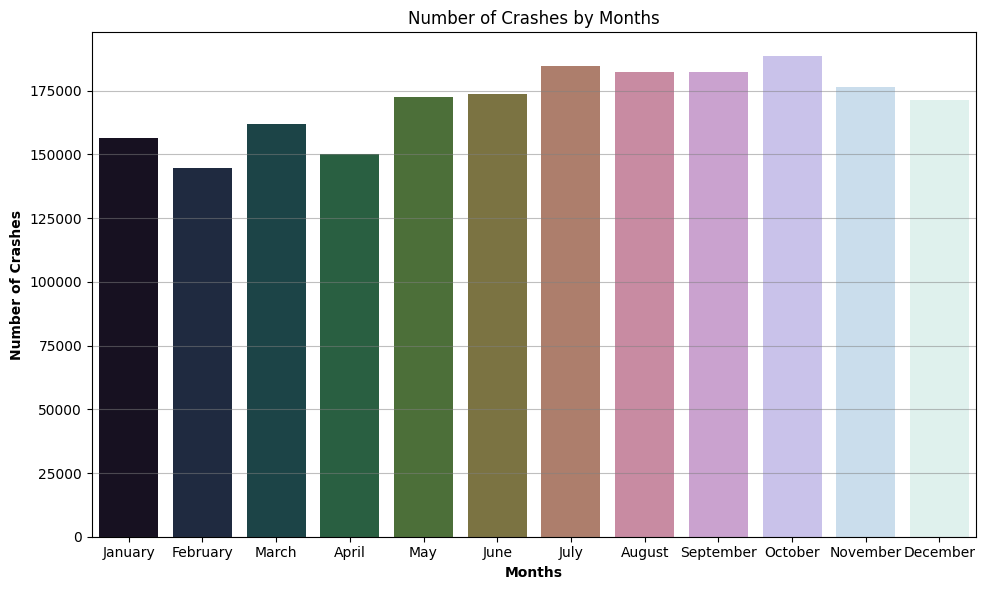

In [ ]:
months = time_analysis['CRASH DATE'].dt.month_name().value_counts()
months = months.reindex(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])

plt.figure(figsize=(10, 6))
sns.barplot(y=months, x=months.index, palette = 'cubehelix')

plt.title('Number of Crashes by Months')
plt.xlabel('Months', fontweight = 'bold')
plt.ylabel('Number of Crashes', fontweight = 'bold')
plt.grid(True, alpha = 0.5, color = 'grey', axis = 'y')

plt.tight_layout()
plt.show()

## <div align="center">⏰ Year and 💥Number of crash</div>

Some insights:


*   There is a noticeable overall decline in the number of crashes as time progresses, particularly noticeable after 2020. The reasons for this decline could be numerous, ranging from improved road safety measures to changes in traffic volume, perhaps due to external factors like the COVID-19 pandemic
*   While the chart is dense and exact seasonal patterns are not immediately clear, there appear to be recurring periods of higher and lower crash numbers, which may suggest seasonal trends or other cyclic events affecting crash rates



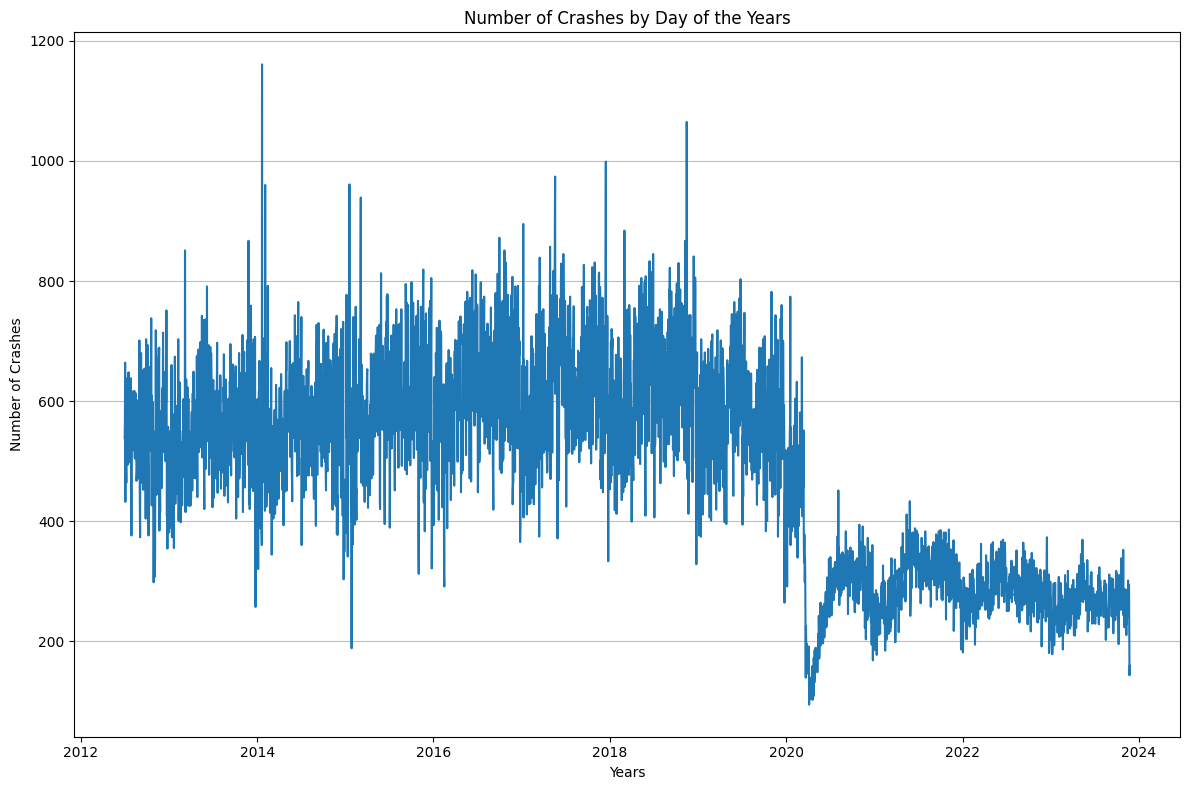

In [ ]:
plt.figure(figsize = (12,8))

sns.lineplot(time_analysis['CRASH DATE'].value_counts())
plt.title('Number of Crashes by Day of the Years')
plt.xlabel('Years')
plt.ylabel('Number of Crashes')
plt.grid(True, alpha = 0.5, color = 'grey', axis = 'y')

plt.tight_layout()
plt.show()

## <div align="center">⏰ Year, ⏰ Day, and 💥Number of crash </div>

Some insights:


*   From the end 2012 to around 2019, the number of crashes appears relatively stable, with no significant increases or decreases over the years. Each day of the week shows consistency in the number of crashes year over year
*   Friday consistently shows as one of the days with the highest number of crashes across all years, which could be related to increased traffic volume and activities as people commute for weekend plans.
*   Mid-week days like Wednesday and Thursday also show a higher number of crashes compared to the beginning of the week
*   The decline starting in 2020 could be indicative of the impact of the COVID-19 pandemic, where lockdowns and restrictions may have led to less traffic and consequently fewer crashes





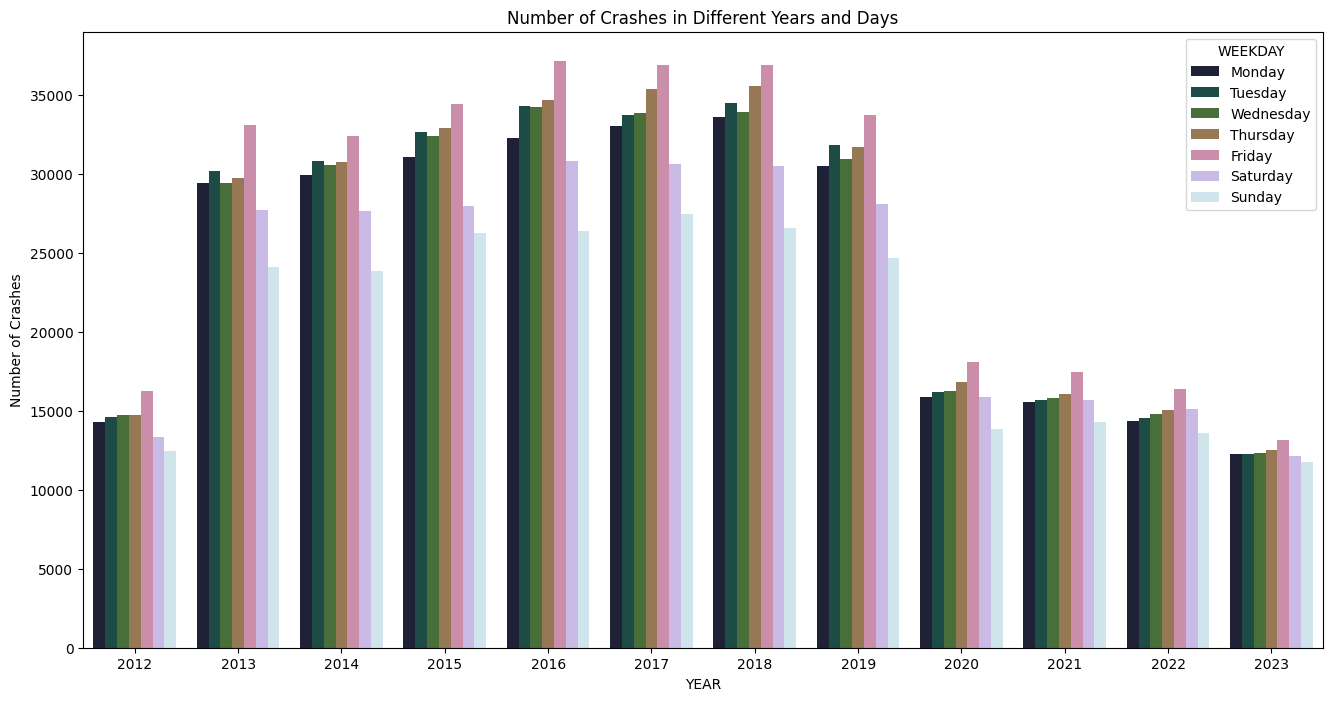

In [ ]:
time_analysis['YEAR'] = time_analysis['CRASH DATE'].dt.year

# Convert 'WEEKDAY' into an ordered categorical type with Monday as the first day
weekdays = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
time_analysis['WEEKDAY'] = pd.Categorical(time_analysis['WEEKDAY'], categories=weekdays, ordered=True)

year_week = time_analysis.groupby(["YEAR", "WEEKDAY"]).size().reset_index(name="Number of Crashes")

year_week.sort_values(by=['YEAR', 'WEEKDAY'], inplace=True)


plt.figure(figsize=(16, 8))
sns.barplot(data=year_week, x="YEAR", y="Number of Crashes", hue="WEEKDAY", palette='cubehelix')
plt.title("Number of Crashes in Different Years and Days")

# Show the plot
plt.show()

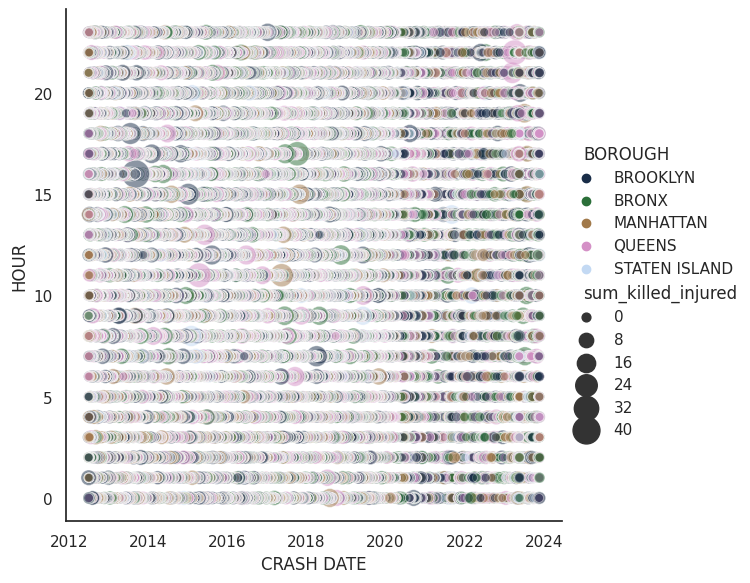

In [ ]:
import seaborn as sns
sns.set_theme(style="white")

time_analysis['sum_killed_injured'] = time_analysis["NUMBER OF PERSONS INJURED"]+time_analysis["NUMBER OF PERSONS KILLED"]

sns.relplot(x="CRASH DATE", y="HOUR",hue="BOROUGH",size="sum_killed_injured",sizes=(40,400),alpha=.5,palette="cubehelix",height=6,data=time_analysis)

## <div align="center">⏰ Time and 💀 People affected</div>

Some insights:


*   The night time shows the highest average number of people affected by crashes. This might be due to a variety of factors, such as reduced visibility, fatigue, or a higher likelihood of drivers under the influence of alcohol or other substances during night hours
*    The morning period has the lowest average number of people affected. This might indicate that although there could be a high number of crashes during morning commutes, they might be less severe or involve fewer people per crash on average






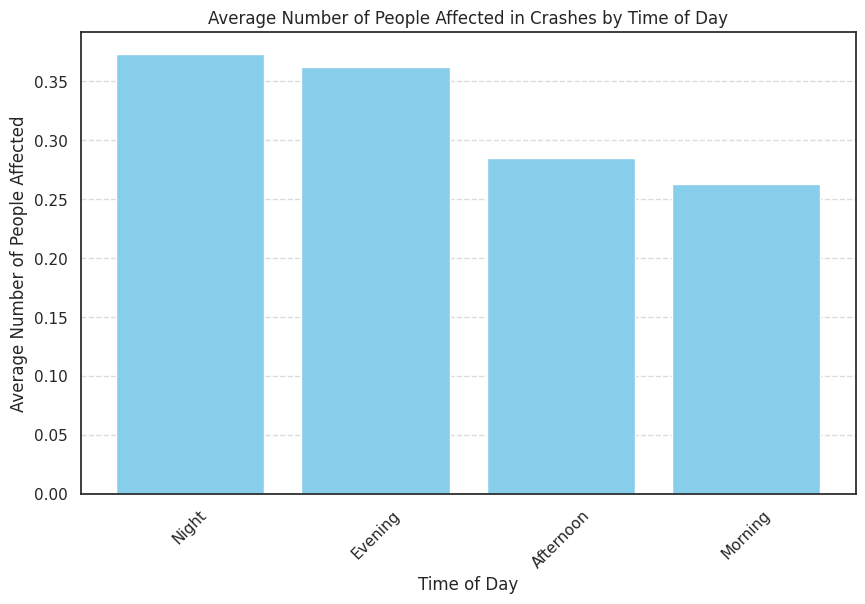

In [ ]:
def categorize_time(time):
    hour = time.hour
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    elif 18 <= hour < 24:
        return 'Evening'
    else:
        return 'Night'


time_analysis['TIME OF DAY'] = time_analysis['CRASH TIME'].apply(categorize_time)

# Calculating the average number of people affected for each time of day
average_affected_by_time = time_analysis.groupby('TIME OF DAY')['sum_killed_injured'].mean().reset_index()

# Sorting the results for a better understanding
average_affected_by_time = average_affected_by_time.sort_values(by='sum_killed_injured', ascending=False)


plt.figure(figsize=(10, 6))
plt.bar(average_affected_by_time['TIME OF DAY'], average_affected_by_time['sum_killed_injured'], color='skyblue')
plt.xlabel('Time of Day')
plt.ylabel('Average Number of People Affected')
plt.title('Average Number of People Affected in Crashes by Time of Day')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

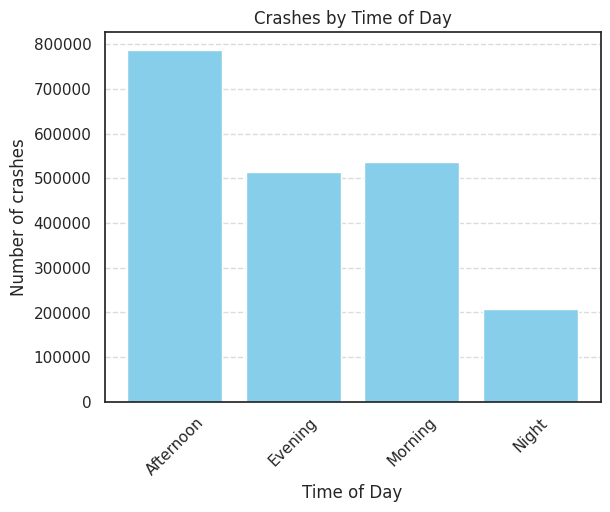

In [ ]:
crash_by_time = time_analysis.groupby('TIME OF DAY')['sum_killed_injured'].count().reset_index()
plt.bar(crash_by_time['TIME OF DAY'], crash_by_time['sum_killed_injured'], color='skyblue')
plt.xlabel('Time of Day')
plt.ylabel('Number of crashes')
plt.title('Crashes by Time of Day')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## <div align="center">⏰ Year, ⏰ Time, 💀 People affected, and 💥Number of crash </div>

Some insights:


*   Larger bubbles, which represent a higher sum of people killed or injured, are scattered throughout the plot but do not appear to follow a clear pattern related to the time of day. This might suggest that the severity of crashes is not necessarily dependent on the time of day
*   The plot uses color coding to distinguish between times of day. It appears that crashes in the Afternoon and Evening are more frequent than in the Morning and Night






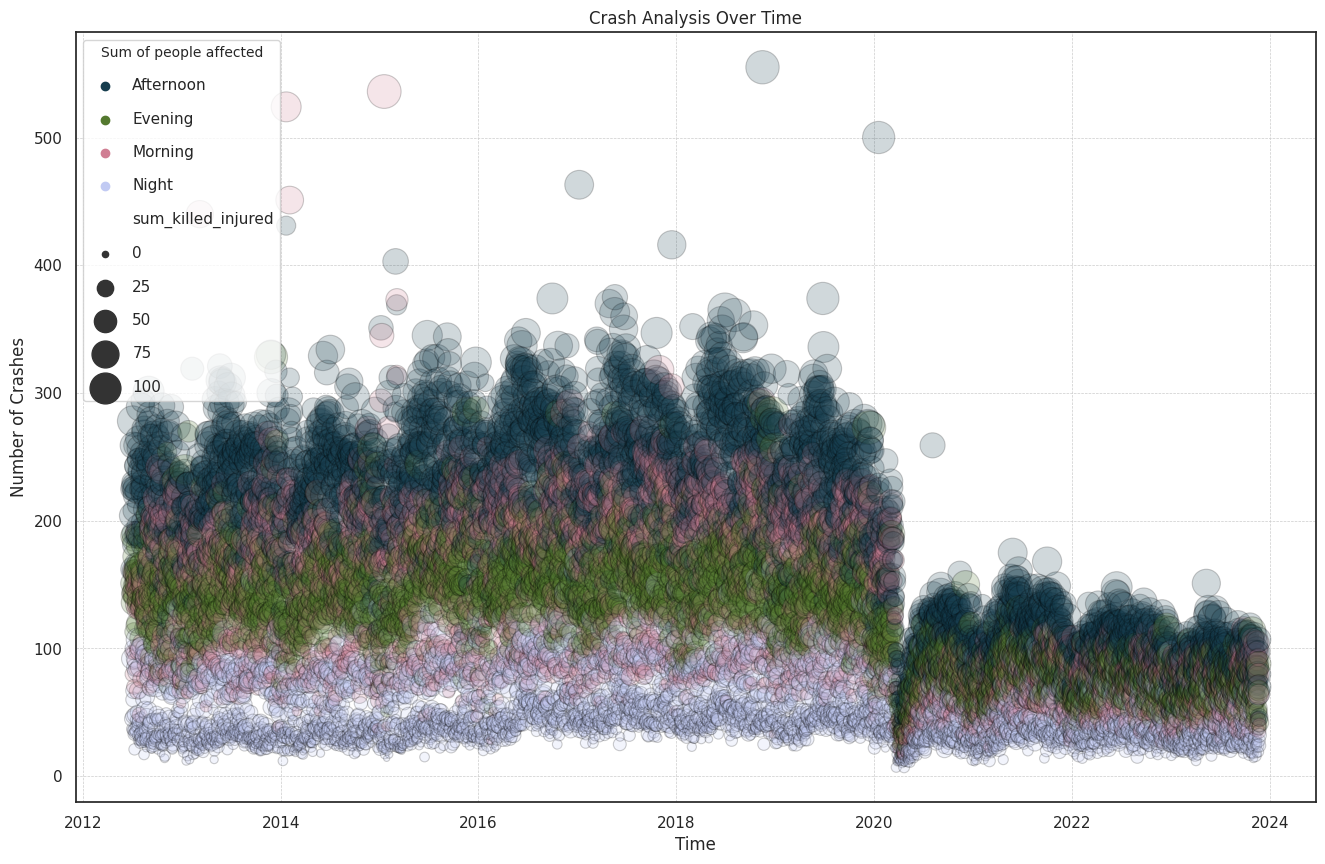

In [ ]:
bubble = time_analysis.groupby(['CRASH DATE','TIME OF DAY']).agg({
    'sum_killed_injured': 'sum',
    'CRASH TIME': 'count'}).reset_index()
plt.figure(figsize=(16, 10))
bubble_plot = sns.scatterplot(
    data=bubble,
    x="CRASH DATE",
    y="CRASH TIME",
    size="sum_killed_injured",
    hue="TIME OF DAY",
    sizes=(20, 600),
    alpha=0.2,
    edgecolor="black",
    linewidth=0.8,
    palette="cubehelix"
)


# Set the axis labels
plt.xlabel('Time')
plt.ylabel('Number of Crashes')

# Add gridlines
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Add a title to the plot
plt.title('Crash Analysis Over Time')

# Adjust the legend
handles, labels = bubble_plot.get_legend_handles_labels()
bubble_plot.legend(
    handles[1:], labels[1:], title="Sum of people affected",
    labelspacing=1.2, title_fontsize='10', loc='upper left'
)


## <div align="center">Crash Contributing Factors Analysis - Mason</div>


<h2 style="background-color: #f8f8f8; border-left: 5px solid #007BFF; padding: 10px; margin: 10px 0;">
    <strong>Objective:</strong> In this section, we examine the most predominant contributing factors to motor vehicle collisions in NYC
</h2>

<div style="color: darkgreen;">
    <h3>🔍 Analysis Focus:</h3>
    <ul>
        <li>Distribution of the most contributing factors</li>
        <li>Distribution of injuries and deaths due to contributing factors</li>
        <li>Analyzing the distribution of contributing factors over time</li>
    </ul>
</div>
---

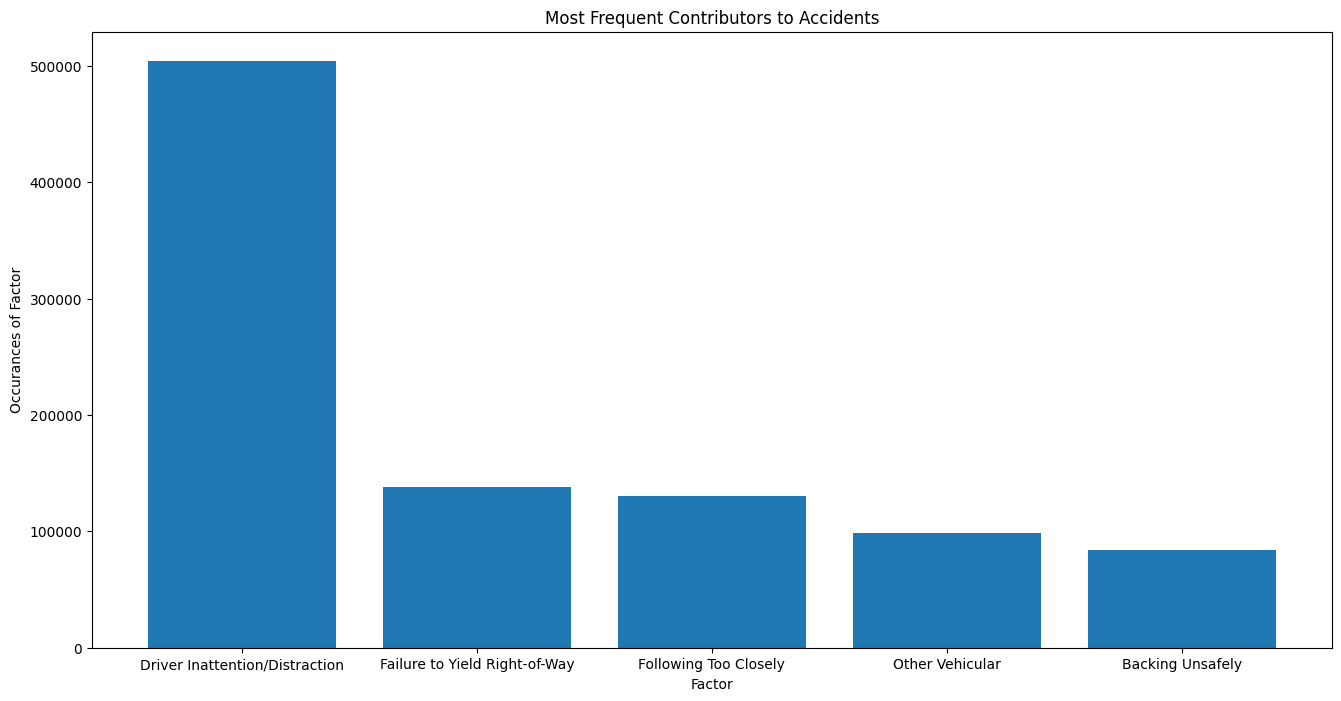

In [ ]:
import matplotlib.pyplot as plt

# finds the total number of occurances for each contributing factor
cont_fact_1 = data['CONTRIBUTING FACTOR VEHICLE 1'].value_counts()
cont_fact_2 = data['CONTRIBUTING FACTOR VEHICLE 2'].value_counts()
cont_fact_3 = data['CONTRIBUTING FACTOR VEHICLE 3'].value_counts()
cont_fact_4 = data['CONTRIBUTING FACTOR VEHICLE 4'].value_counts()
cont_fact_5 = data['CONTRIBUTING FACTOR VEHICLE 5'].value_counts()

# combines value counts of each contributing factor
cont_fact_sum = cont_fact_1.add(cont_fact_2, fill_value=0).add(cont_fact_3, fill_value=0).add(cont_fact_4, fill_value=0).add(cont_fact_5, fill_value=0)

# sorts the series in descending order
cont_fact_filtered = cont_fact_sum.sort_values(ascending=False)

# ignores the unspecified contributing factors and finds the next top 5 factors
cont_fact_filtered2 = cont_fact_filtered.iloc[1:6]

# plots the chart
plt.figure(figsize=(16,8))
plt.bar(cont_fact_filtered2.index, cont_fact_filtered2.values)
plt.xlabel('Factor')
plt.ylabel('Occurances of Factor')
plt.title('Most Frequent Contributors to Accidents')
plt.show()

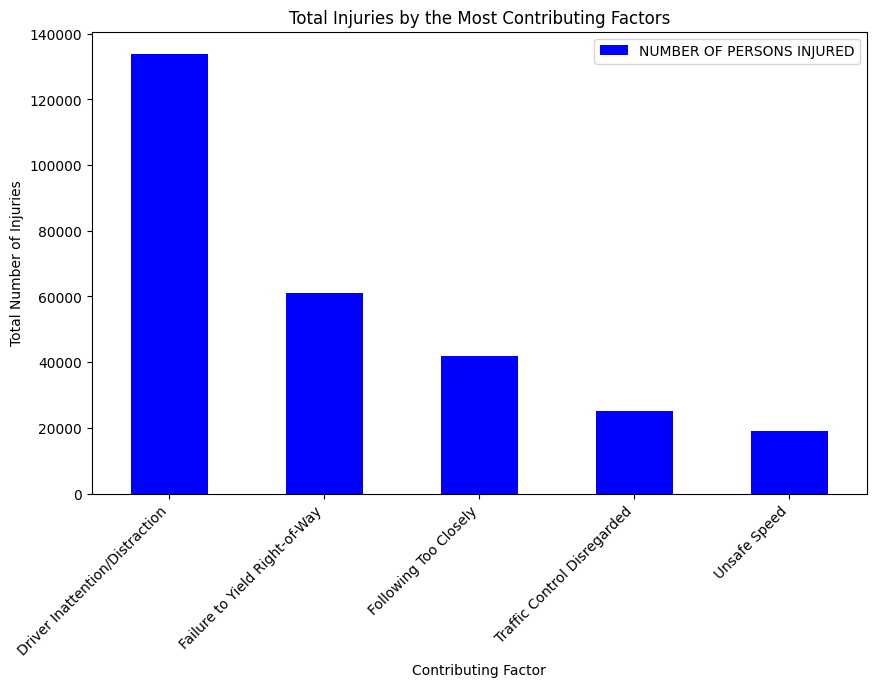

In [ ]:
# group by contributing factor and calculate the total number of injuries
factor_grouped = data.groupby('CONTRIBUTING FACTOR VEHICLE 1')['NUMBER OF PERSONS INJURED'].sum().reset_index()

factored_ordered = factor_grouped.sort_values(by ='NUMBER OF PERSONS INJURED', ascending=False)

# ignores the unspecified contributing factors and finds the next top 5 factors
factored_top5 = factored_ordered.iloc[1:6]

# Plot the bar chart
fig, ax = plt.subplots(figsize=(10, 6))

factored_top5.plot(kind='bar', x='CONTRIBUTING FACTOR VEHICLE 1', y='NUMBER OF PERSONS INJURED', ax=ax, color='blue')
plt.title('Total Injuries by the Most Contributing Factors')
plt.xlabel('Contributing Factor')
plt.ylabel('Total Number of Injuries')
plt.xticks(rotation=45, ha='right')

plt.show()

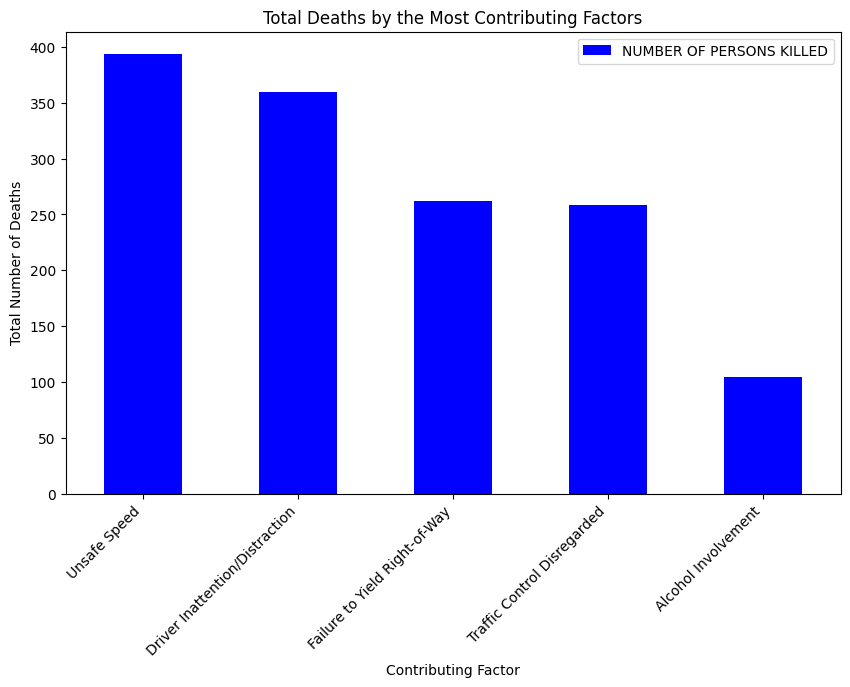

In [ ]:
# Group by contributing factor and calculate the total number of deaths
factor_grouped = data.groupby('CONTRIBUTING FACTOR VEHICLE 1')['NUMBER OF PERSONS KILLED'].sum().reset_index()

factored_ordered = factor_grouped.sort_values(by ='NUMBER OF PERSONS KILLED', ascending=False)

# ignores the unspecified contributing factors and finds the next top 5 factors
factored_top5 = factored_ordered.iloc[1:6]

# plot bar chart
fig, ax = plt.subplots(figsize=(10, 6))

factored_top5.plot(kind='bar', x='CONTRIBUTING FACTOR VEHICLE 1', y='NUMBER OF PERSONS KILLED', ax=ax, color='blue')
plt.title('Total Deaths by the Most Contributing Factors')
plt.xlabel('Contributing Factor')
plt.ylabel('Total Number of Deaths')
plt.xticks(rotation=45, ha='right')

plt.show()

In [ ]:
factor_grouped

,CONTRIBUTING FACTOR VEHICLE 1,NUMBER OF PERSONS KILLED
0,1,0.0
1,80,0.0
2,Accelerator Defective,0.0
3,Aggressive Driving/Road Rage,22.0
4,Alcohol Involvement,104.0
...,...,...
56,Unspecified,978.0
57,Using On Board Navigation Device,0.0
58,Vehicle Vandalism,0.0
59,View Obstructed/Limited,20.0


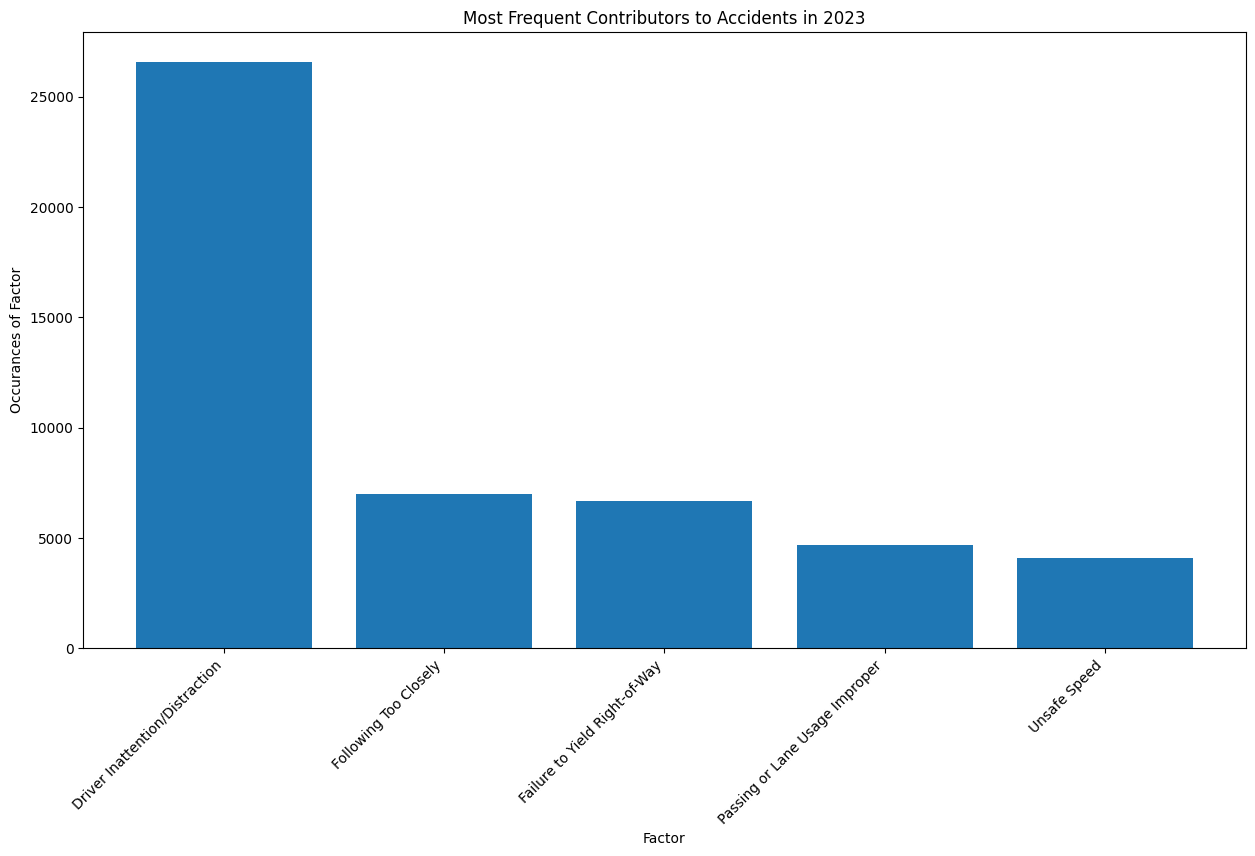

In [ ]:
# convert 'CRASH DATE' to datetime
data['CRASH DATE'] = pd.to_datetime(data['CRASH DATE'])

# create column YEAR for the year of the accident
data['YEAR'] = data['CRASH DATE'].dt.year

data_2023 = data[data['YEAR'] == 2023].copy()

# finds the total number of occurances for each contributing factor
cont_fact_1 = data_2023['CONTRIBUTING FACTOR VEHICLE 1'].value_counts()
cont_fact_2 = data_2023['CONTRIBUTING FACTOR VEHICLE 2'].value_counts()
cont_fact_3 = data_2023['CONTRIBUTING FACTOR VEHICLE 3'].value_counts()
cont_fact_4 = data_2023['CONTRIBUTING FACTOR VEHICLE 4'].value_counts()
cont_fact_5 = data_2023['CONTRIBUTING FACTOR VEHICLE 5'].value_counts()

# combines value counts of each contributing factor
cont_fact_sum = cont_fact_1.add(cont_fact_2, fill_value=0).add(cont_fact_3, fill_value=0).add(cont_fact_4, fill_value=0).add(cont_fact_5, fill_value=0)

# sorts the series in descending order
cont_fact_filtered = cont_fact_sum.sort_values(ascending=False)

# ignores the unspecified contributing factors and finds the next top 5 factors
cont_fact_filtered2 = cont_fact_filtered.iloc[1:6]

# plots the chart
plt.figure(figsize=(15,8))
plt.bar(cont_fact_filtered2.index, cont_fact_filtered2.values)
plt.xlabel('Factor')
plt.ylabel('Occurances of Factor')
plt.title('Most Frequent Contributors to Accidents in 2023')
plt.xticks(rotation=45, ha='right')
plt.show()

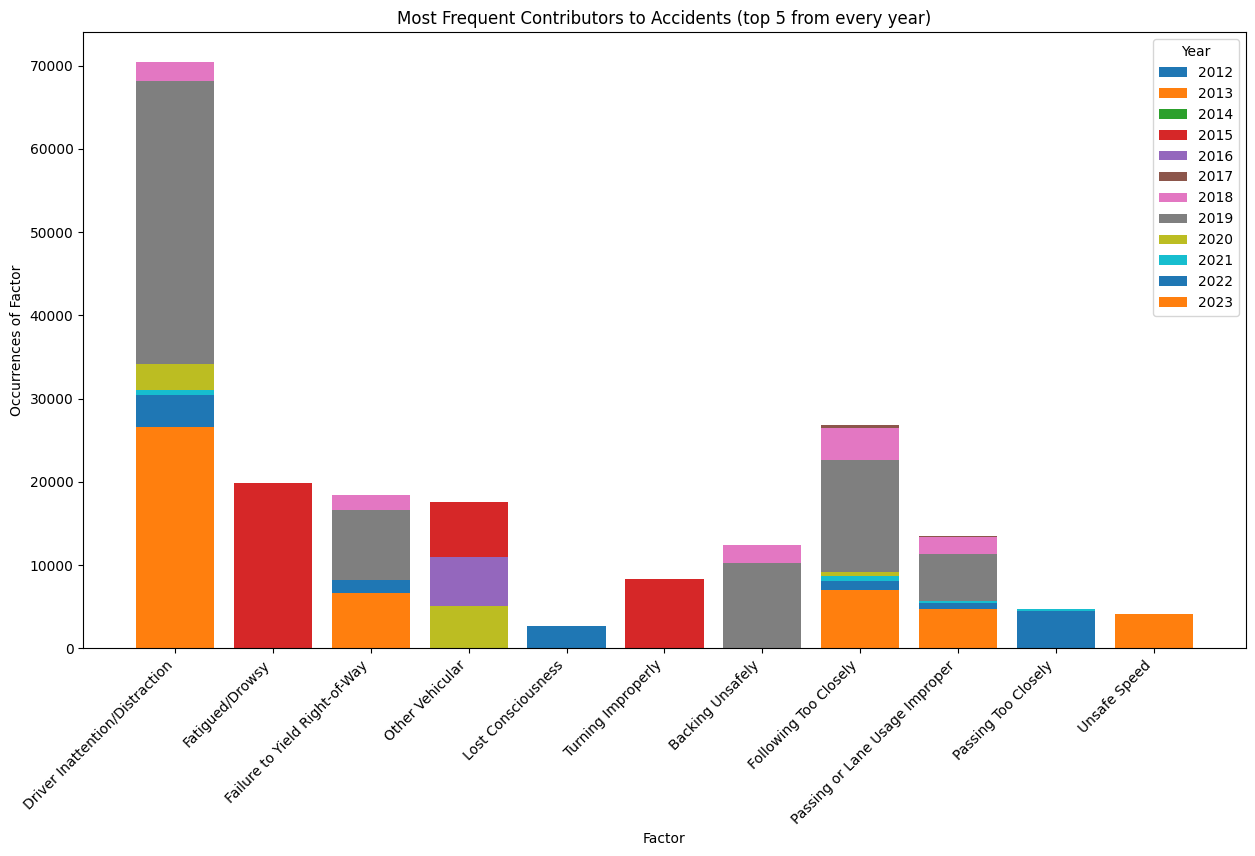

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# convert 'CRASH DATE' to datetime
data['CRASH DATE'] = pd.to_datetime(data['CRASH DATE'])

# create column YEAR for the year of the accident
data['YEAR'] = data['CRASH DATE'].dt.year

# set up plot
plt.figure(figsize=(15, 8))

# iterate over unique years in the dataframe
for year in sorted(data['YEAR'].unique()):
    # filter data for the current year
    data_year = data[data['YEAR'] == year].copy()

    # find the total number of occurrences for each contributing factor
    cont_fact_1 = data_year['CONTRIBUTING FACTOR VEHICLE 1'].value_counts()
    cont_fact_2 = data_year['CONTRIBUTING FACTOR VEHICLE 2'].value_counts()
    cont_fact_3 = data_year['CONTRIBUTING FACTOR VEHICLE 3'].value_counts()
    cont_fact_4 = data_year['CONTRIBUTING FACTOR VEHICLE 4'].value_counts()
    cont_fact_5 = data_year['CONTRIBUTING FACTOR VEHICLE 5'].value_counts()

    # combine value counts of each contributing factor into one series
    cont_fact_sum = (
        cont_fact_1.add(cont_fact_2, fill_value=0)
        .add(cont_fact_3, fill_value=0)
        .add(cont_fact_4, fill_value=0)
        .add(cont_fact_5, fill_value=0)
    )

    # sort the series in descending order
    cont_fact_filtered = cont_fact_sum.sort_values(ascending=False)

    # ignore the 'unspecified' contributing factors and find the next top 5 factors
    cont_fact_filtered2 = cont_fact_filtered.iloc[1:6]

    # plot the bar chart for the current year
    plt.bar(cont_fact_filtered2.index, cont_fact_filtered2.values, label=str(year))

# labels and title
plt.xlabel('Factor')
plt.ylabel('Occurrences of Factor')
plt.xticks(rotation=45, ha='right')
plt.title('Most Frequent Contributors to Accidents (top 5 from every year)')

# legend
plt.legend(title='Year', loc='upper right')

plt.show()

## Geospatial Analysis of Collision Hotspots - Chen


In [ ]:
# Drop rows with missing values in specific columns ('BOROUGH', 'ZIP CODE', 'LATITUDE', 'LONGITUDE')
crash_data = crash_data.dropna(subset=['BOROUGH', 'ZIP CODE', 'LATITUDE', 'LONGITUDE'])

# Convert the "CRASH DATE" column to datetime
crash_data['CRASH DATE'] = pd.to_datetime(crash_data['CRASH DATE'])

<ipython-input-34-9ae1c4253c45>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crash_data['CRASH DATE'] = pd.to_datetime(crash_data['CRASH DATE'])


In [ ]:
# Filter the DataFrame for the year 2023 and create a copy
crash_data_2023 = crash_data[crash_data['CRASH DATE'].dt.year == 2023].copy()

# Filter the 2023 DataFrame for sum_killed_injured >= 3.0
crash_data_2023['sum_killed_injured'] = crash_data_2023["NUMBER OF PERSONS INJURED"] + crash_data_2023["NUMBER OF PERSONS KILLED"]
crash_data_2023_filtered = crash_data_2023[crash_data_2023['sum_killed_injured'] >= 3.0]

In [ ]:
# Install the Folium library using the pip package manager
!pip install folium

In [ ]:
# Import required libraries for Folium map visualization
import folium
from folium.plugins import HeatMap
from IPython.display import display

In [ ]:
# Create a Folium map centered on New York City with a specified zoom level
nyc_map = folium.Map(location=[40.7128, -74.0060], zoom_start=12)

# Convert the "LATITUDE" and "LONGITUDE" columns to a list of lists for HeatMap
heat_data = [[row['LATITUDE'], row['LONGITUDE']] for index, row in crash_data_2023_filtered.iterrows()]

# Create a HeatMap layer using the heat_data
HeatMap(heat_data).add_to(nyc_map)

# Add a title to the map using folium.Html
title_html = """
             <h3 align="center" style="font-size:16px"><b>Crash Collision Heatmap for Sum of Injuries and Fatalities ≥ 3 in NYC Boroughs in 2023</b></h3>
             """
nyc_map.get_root().html.add_child(folium.Element(title_html))

In [ ]:
# Display the map
display(nyc_map)

In [ ]:
# Filter the 2023 crash data for Queens borough and create a copy
queens_data = crash_data_2023_filtered[crash_data_2023_filtered['BOROUGH'] == 'QUEENS'].copy()

# Calculate the sum of cyclist injuries and fatalities
queens_data['sum_cyclist'] = queens_data["NUMBER OF CYCLIST INJURED"] + queens_data["NUMBER OF CYCLIST KILLED"]

# Calculate the sum of pedestrian injuries and fatalities
queens_data['sum_pedestrian'] = queens_data["NUMBER OF PEDESTRIANS INJURED"] + queens_data["NUMBER OF PEDESTRIANS KILLED"]

# Calculate the sum of motorist injuries and fatalities
queens_data['sum_motorist'] = queens_data["NUMBER OF MOTORIST INJURED"] + queens_data["NUMBER OF MOTORIST KILLED"]


# Create a base map centered around Queens
queens_map = folium.Map(location=[40.7282, -73.7949], zoom_start=12)

# Drop rows with NaN in relevant columns
queens_data = queens_data.dropna(subset=['LATITUDE', 'LONGITUDE', 'ZIP CODE'])
# Assuming queens_data is your DataFrame with 'ZIP CODE' column
queens_data['ZIP CODE'] = queens_data['ZIP CODE'].astype(str)
queens_data['ZIP CODE'] = queens_data['ZIP CODE'].str.rstrip('.0').astype(int)

# Create a HeatMap layer using the lat, lng, and color-coded by ZIP CODE
HeatMap(queens_data[['LATITUDE', 'LONGITUDE', 'ZIP CODE']].values, gradient={0.2: 'blue', 0.4: 'green', 0.6: 'yellow', 1: 'red'}).add_to(queens_map)

# Add a title to the map using folium.Html
title_html = """
             <h3 align="center" style="font-size:16px"><b>Queens Borough Motor Crash Heatmap by Latitude, Longitude, and Zip Code | Injury and Casualty Statistics for Cyclists and Pedestrians in 2023</b></h3>
             """
queens_map.get_root().html.add_child(folium.Element(title_html))

for index, row in queens_data.iterrows():
    lat, lon = row['LATITUDE'], row['LONGITUDE']
    sum_cyclist, sum_pedestrian = row['sum_cyclist'], row['sum_pedestrian']

    # Check if sum of cyclist is greater than 1, add a blue marker
    if sum_cyclist > 0:
        folium.Marker(location=[lat, lon], icon=folium.Icon(color='blue'), popup=f'Sum of Cyclists Injured or Killed: {sum_cyclist}').add_to(queens_map)

    # Check if sum of pedestrian is greater than 1, add a green marker
    if sum_pedestrian > 0:
        folium.Marker(location=[lat, lon], icon=folium.Icon(color='green'), popup=f'Sum of Pedestrians Injured or Killed: {sum_pedestrian}').add_to(queens_map)


# Display the map in the Colab notebook
display(queens_map)
